# Fourier Transform


임의의 입력 신호를 다양한 주파수를 갖는 주기함수들의 합으로 분해하여 표현


- 중요성: 객체에 대한 여러 시점으로 분석하려고 할 때 수학적인 기법을 통해 한 시점에서 다른 시점으로 Transform할 수 있습니다.


- 적용: Time Domain에서 Frequency Domain으로 Transform 하는 데에 사용할 수 있다. 필요한 Freq만 뽑아서 사용하는 데에 적용할 수 있습니다.

# FFT 사용

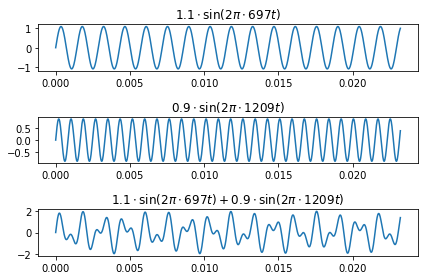

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.fftpack import dct

# 정현파 조합 ##############################
N = 1024
T = 1.0 / 44100.0
f1 = 697
f2 = 1209
t = np.linspace(0.0, N*T, N)
y1 = 1.1 * np.sin(2 * np.pi * f1 * t)
y2 = 0.9 * np.sin(2 * np.pi * f2 * t)
# y1과 y2 주파수를 조합합니다.
y = y1 + y2

# 1.1 * sin(2pi * 697t)의 그래프를 그립니다.
plt.subplot(311)
plt.plot(t, y1)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t)$")

# 0.9 * sin(2pi * 1209t)의 그래프를 그립니다.
plt.subplot(312)
plt.plot(t, y2)
plt.title(r"$0.9\cdot\sin(2\pi\cdot 1209t)$")

# 두 주파수를 조합한 정현파의 그래프를 그립니다.
plt.subplot(313)
plt.plot(t, y)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t) + 0.9\cdot\sin(2\pi\cdot 1209t)$")

plt.tight_layout()
plt.show()

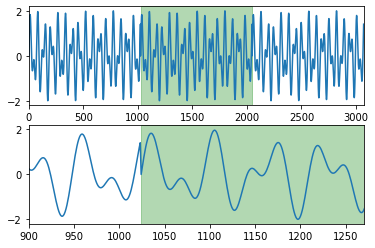

In [2]:
# 고속 퓨리에 변환 1 ##############################
# 주파수를 분석해 주파수의 모습을 시각화하는 코드입니다.
y2 = np.hstack([y, y, y])

plt.subplot(211)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(0, 3 * N)

plt.subplot(212)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(900, 1270)

plt.show()

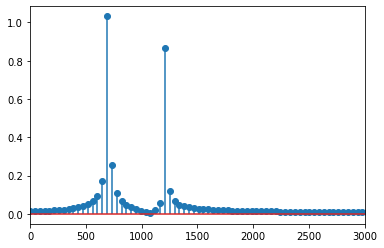

In [3]:
# 고속 퓨리에 변환 2 ##############################
# fft 명령으로 성분이 강하게 나타나는 신호를 분석합니다.
yf = fft(y, N)
# 0~3000 까지의 x 값을 만들어줍니다.
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
# 퓨리에 공식으로 정규화한 과정
yff = 2.0/N * np.abs(yf[0:N//2])

# 시각화
plt.stem(xf, yff, use_line_collection=True)
plt.xlim(0, 3000)

plt.show()

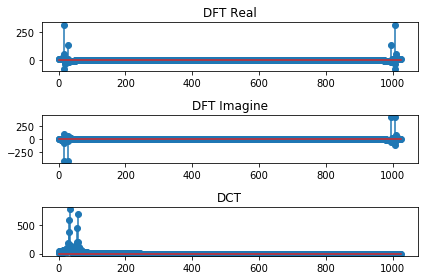

In [4]:
# DCT ##############################
# cosine 함수를 사용하는 변환함수입니다.
# DFT 보다 계산이 간단하고 실수만을 출력합니다.
dct_type = 2
yf2 = dct(y, dct_type, N)

# 실수부 출력
plt.subplot(311)
plt.stem(np.real(yf), use_line_collection=True)
plt.title("DFT Real")

# 허수부 출력
plt.subplot(312)
plt.stem(np.imag(yf), use_line_collection=True)
plt.title("DFT Imagine")

# DCT
plt.subplot(313)
plt.stem(np.abs(yf2), use_line_collection=True)
plt.title("DCT")

plt.tight_layout()
plt.show()

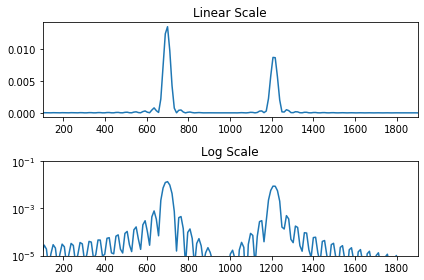

In [5]:
# 스펙트럼 ##############################
# 확률론적인 확률과정(random process) 모형을 주파수 영역으로 변환
# 시계열을 짧은 구간으로 나눈 뒤 깁스 현상을 줄위기 위해
# 각 구간에 윈도우를 씌우고 FFT 계산으로 나온 값을 평균하는 방법
f, P = signal.periodogram(y, 44100, nfft=2**12)

plt.subplot(211)
plt.plot(f, P)
plt.xlim(100, 1900)
plt.title("Linear Scale")

plt.subplot(212)
plt.semilogy(f, P)
plt.xlim(100, 1900)
plt.ylim(1e-5, 1e-1)
plt.title("Log Scale")

plt.tight_layout()
plt.show()